# Business Questions

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

# sales.csv analysis

In [369]:
#df_sales data frame created
df_sales = pd.read_csv('sales.csv', sep=',')
# Filter out rows with negative sales and assign the filtered dataframe back to df_sales
df_sales = df_sales[df_sales['Sales'] >= 0]

df_sales.head(2)

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
9,3451,0.38,10002489,1/12/2012,1.4380,1/12/2012,319167,Super Vegetable Oil,10291,1.00,116691,1/12/2012,1.38,1.0,109
10,3452,0.46,10008381,1/12/2012,1.7848,1/12/2012,319174,Ebony Green Pepper,10801,1.25,116701,1/12/2012,1.71,1.0,111


In [370]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93730 entries, 9 to 96465
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   %KEY                    93730 non-null  int64  
 1   Cost                    93730 non-null  float64
 2   Customer Number         93730 non-null  int64  
 3   Date                    93730 non-null  object 
 4   GrossSales              93730 non-null  float64
 5   Invoice Date            93730 non-null  object 
 6   Invoice Number          93730 non-null  int64  
 7   Item Desc               93730 non-null  object 
 8   Item Number             93730 non-null  int64  
 9   Margin                  93730 non-null  float64
 10  Order Number            93730 non-null  int64  
 11  Promised Delivery Date  93730 non-null  object 
 12  Sales                   93730 non-null  float64
 13  Sales Qty               93730 non-null  float64
 14  Sales Rep Number        93730 non-null

In [371]:
#check for duplicated rows
df_sales.duplicated().sum()

0

In [372]:
# Check for missing or null values
df_sales.isnull().sum()

%KEY                      0
Cost                      0
Customer Number           0
Date                      0
GrossSales                0
Invoice Date              0
Invoice Number            0
Item Desc                 0
Item Number               0
Margin                    0
Order Number              0
Promised Delivery Date    0
Sales                     0
Sales Qty                 0
Sales Rep Number          0
dtype: int64

In [373]:
# Convert the date column to datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Extract the month and year components of the date
df_sales['Month'] = df_sales['Date'].dt.month
df_sales['Year'] = df_sales['Date'].dt.year

df_sales.head()

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number,Month,Year
9,3451,0.38,10002489,2012-01-12,1.4380,1/12/2012,319167,Super Vegetable Oil,10291,1.00,116691,1/12/2012,1.38,1.0,109,1,2012
10,3452,0.46,10008381,2012-01-12,1.7848,1/12/2012,319174,Ebony Green Pepper,10801,1.25,116701,1/12/2012,1.71,1.0,111,1,2012
11,3453,1.14,10000486,2012-01-12,3.3824,1/12/2012,319069,Imagine Frozen Pancakes,10707,2.10,116629,1/12/2012,3.24,2.0,162,1,2012
12,3454,2.13,10000486,2012-01-12,4.5453,1/12/2012,319069,Gorilla Head Cheese,10673,2.24,116629,1/12/2012,4.37,3.0,162,1,2012
13,3455,7.76,10021472,2012-01-12,5.6549,1/12/2012,319142,Imagine Frozen Carrots,10717,-2.34,116622,1/12/2012,5.42,1.0,154,1,2012


In [374]:
#rename Sales Rep Number as Sales Rep Id to merge with other data sets
df_sales.rename(columns={'Sales Rep Number' : 'Sales Rep ID'}, inplace=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93730 entries, 9 to 96465
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   %KEY                    93730 non-null  int64         
 1   Cost                    93730 non-null  float64       
 2   Customer Number         93730 non-null  int64         
 3   Date                    93730 non-null  datetime64[ns]
 4   GrossSales              93730 non-null  float64       
 5   Invoice Date            93730 non-null  object        
 6   Invoice Number          93730 non-null  int64         
 7   Item Desc               93730 non-null  object        
 8   Item Number             93730 non-null  int64         
 9   Margin                  93730 non-null  float64       
 10  Order Number            93730 non-null  int64         
 11  Promised Delivery Date  93730 non-null  object        
 12  Sales                   93730 non-null  float6

In [375]:
# latest data in the set
print(df_sales.sort_values('Date', ascending=False).iloc[0])

%KEY                                             60558
Cost                                          15162.12
Customer Number                               10010923
Date                               2014-06-26 00:00:00
GrossSales                                   33901.218
Invoice Date                                 6/26/2014
Invoice Number                                  206807
Item Desc                 Big Time Frozen Cheese Pizza
Item Number                                      10403
Margin                                        19756.14
Order Number                                    303419
Promised Delivery Date                       6/26/2014
Sales                                         34918.26
Sales Qty                                        180.0
Sales Rep ID                                       103
Month                                                6
Year                                              2014
Name: 96465, dtype: object


In [376]:
# earliest data in the set
print(df_sales.sort_values('Date', ascending=True).iloc[0])

%KEY                                     3451
Cost                                     0.38
Customer Number                      10002489
Date                      2012-01-12 00:00:00
GrossSales                              1.438
Invoice Date                        1/12/2012
Invoice Number                         319167
Item Desc                 Super Vegetable Oil
Item Number                             10291
Margin                                    1.0
Order Number                           116691
Promised Delivery Date              1/12/2012
Sales                                    1.38
Sales Qty                                 1.0
Sales Rep ID                              109
Month                                       1
Year                                     2012
Name: 9, dtype: object


# item_master.csv analysis

In [377]:
#df_item_master data frame created
df_item_master = pd.read_csv('item_master.csv',sep=',')
df_item_master.head(2)

,Item Number,Product Group,Product Line,Product Sub Group,Product Type
0,10001,Beverages,Drink,Juice,Pure Juice Beverages
1,10002,Beverages,Drink,Flavored Drinks,Drinks


In [378]:
df_item_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item Number        827 non-null    int64 
 1   Product Group      827 non-null    object
 2   Product Line       827 non-null    object
 3   Product Sub Group  827 non-null    object
 4   Product Type       827 non-null    object
dtypes: int64(1), object(4)
memory usage: 32.4+ KB


In [379]:
#check for duplicated rows
df_item_master.duplicated().sum()

0

In [380]:
# Check for missing or null values
df_item_master.isnull().sum()

Item Number          0
Product Group        0
Product Line         0
Product Sub Group    0
Product Type         0
dtype: int64

# sales_rep.csv analysis

In [381]:
#df_sales_rep data frame created
df_sales_rep = pd.read_csv('sales_rep.csv', sep=',')


In [382]:
df_sales_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Manager          64 non-null     object
 1   Manager Number   64 non-null     int64 
 2   Path             64 non-null     object
 3   Sales Rep Name   64 non-null     object
 4   Sales Rep Name1  64 non-null     object
 5   Sales Rep Name2  59 non-null     object
 6   Sales Rep Name3  39 non-null     object
 7   Sales Rep ID     64 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 4.1+ KB


In [383]:
# columns with null values removed as no need to answer business questions
df_sales_rep = df_sales_rep.drop(['Sales Rep Name1','Sales Rep Name2','Sales Rep Name3'], axis=1)

In [384]:
df_sales_rep.head(2)

,Manager,Manager Number,Path,Sales Rep Name,Sales Rep ID
0,Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,103
1,Amanda Honda,104,Amanda Honda-Cart Lynch,Cart Lynch,112


# customers.csv analysis

In [385]:
#df_customers data frame created
df_customers = pd.read_csv('customers.csv', sep=',', encoding='ISO-8859-1')
df_customers.head(2)

,Customer,Customer Number,City Code
0,A Superior System,10000453,1
1,A&B,10000456,76


In [386]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer         684 non-null    object
 1   Customer Number  684 non-null    int64 
 2   City Code        684 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.2+ KB


# cities.csv analysis

In [387]:
#df_cities data frame created
df_cities = pd.read_csv('cities.csv',sep=',', encoding='ISO-8859-1')
df_cities.head(2)

,City,City Code,Region,Latitude,Longitude,Desc
0,New York,1,USA,40.730599,-73.986581,"""New York City, NY, US"""
1,Los Angeles,2,USA,34.053678,-118.242702,"""Los Angeles, Los Angeles County, CA, US"""


In [388]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       100 non-null    object 
 1   City Code  100 non-null    int64  
 2   Region     100 non-null    object 
 3   Latitude   100 non-null    float64
 4   Longitude  100 non-null    float64
 5   Desc       99 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [389]:
#check for duplicated rows
df_cities.duplicated().sum()

0

In [390]:
# Check for missing or null values
df_cities.isnull().sum()

City         0
City Code    0
Region       0
Latitude     0
Longitude    0
Desc         1
dtype: int64

In [391]:
df_cities = df_cities.drop('Desc', axis=1)

In [392]:
df_cities.head(2)

,City,City Code,Region,Latitude,Longitude
0,New York,1,USA,40.730599,-73.986581
1,Los Angeles,2,USA,34.053678,-118.242702


# Merge (sales.csv+item_master.csv) for Top 5 product group

In [393]:
df_sales_items = pd.merge(df_sales, df_item_master, how="left", left_on="Item Number", right_on="Item Number")
df_sales_items.head(2)

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,...,Promised Delivery Date,Sales,Sales Qty,Sales Rep ID,Month,Year,Product Group,Product Line,Product Sub Group,Product Type
0,3451,0.38,10002489,2012-01-12,1.4380,1/12/2012,319167,Super Vegetable Oil,10291,1.00,...,1/12/2012,1.38,1.0,109,1,2012,Baking Goods,Food,Cooking Oil,Baking Goods
1,3452,0.46,10008381,2012-01-12,1.7848,1/12/2012,319174,Ebony Green Pepper,10801,1.25,...,1/12/2012,1.71,1.0,111,1,2012,Produce,Food,Fresh Vegetables,Vegetables


In [394]:
df_sales_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93730 entries, 0 to 93729
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   %KEY                    93730 non-null  int64         
 1   Cost                    93730 non-null  float64       
 2   Customer Number         93730 non-null  int64         
 3   Date                    93730 non-null  datetime64[ns]
 4   GrossSales              93730 non-null  float64       
 5   Invoice Date            93730 non-null  object        
 6   Invoice Number          93730 non-null  int64         
 7   Item Desc               93730 non-null  object        
 8   Item Number             93730 non-null  int64         
 9   Margin                  93730 non-null  float64       
 10  Order Number            93730 non-null  int64         
 11  Promised Delivery Date  93730 non-null  object        
 12  Sales                   93730 non-null  float6

# Merge2 (sales_items+sales_rep) for Top Performers

In [395]:
df_sales_items_rep = pd.merge(df_sales_items, df_sales_rep, how="left", left_on="Sales Rep ID", right_on="Sales Rep ID")
df_sales_items_rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93730 entries, 0 to 93729
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   %KEY                    93730 non-null  int64         
 1   Cost                    93730 non-null  float64       
 2   Customer Number         93730 non-null  int64         
 3   Date                    93730 non-null  datetime64[ns]
 4   GrossSales              93730 non-null  float64       
 5   Invoice Date            93730 non-null  object        
 6   Invoice Number          93730 non-null  int64         
 7   Item Desc               93730 non-null  object        
 8   Item Number             93730 non-null  int64         
 9   Margin                  93730 non-null  float64       
 10  Order Number            93730 non-null  int64         
 11  Promised Delivery Date  93730 non-null  object        
 12  Sales                   93730 non-null  float6

# Merge3 (customers+cities) for Biggest Markets

In [396]:
df_customer_cities = pd.merge(df_customers, df_cities, how="left", left_on="City Code", right_on="City Code")
df_customer_cities.head(5)

,Customer,Customer Number,City Code,City,Region,Latitude,Longitude
0,A Superior System,10000453,1,New York,USA,40.730599,-73.986581
1,A&B,10000456,76,Barcelona,Spain,41.382560,2.177135
2,A&G,10000457,2,Los Angeles,USA,34.053678,-118.242702
3,A&R Partners,10000458,43,Birmingham,UK,52.481368,-1.898073
4,A1 Datacom Supply,10000461,77,Valencia,Spain,39.334197,-0.796958


In [397]:
df_customer_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 683
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer         684 non-null    object 
 1   Customer Number  684 non-null    int64  
 2   City Code        684 non-null    int64  
 3   City             684 non-null    object 
 4   Region           684 non-null    object 
 5   Latitude         684 non-null    float64
 6   Longitude        684 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 42.8+ KB


In [398]:
print(df_customer_cities['Customer Number'].nunique())

683


In [399]:
# deu to duplicated sales records, looked for rows with same customer number
customer_duplicates = df_customer_cities.duplicated(subset=['Customer Number'], keep=False)
customer_duplicated_rows = df_customer_cities[duplicates_mask].sort_values('Customer Number')
print(customer_duplicated_rows)

    Customer  Customer Number  City Code    City  Region   Latitude  Longitude
467     PING         10021911         64  Malmoe  Nordic  55.605293  13.000157
468     Ping         10021911         65    Oslo  Nordic  59.913269  10.739111


In [400]:
# Ping is a customer with 2 locations in the same region, dropped the second location as customer is seeking only Revenue by Region
# and to avoid duplicated sales records
df_customer_cities.drop_duplicates(subset='Customer Number', keep='first', inplace=True)

In [401]:
df_customer_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 683
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer         683 non-null    object 
 1   Customer Number  683 non-null    int64  
 2   City Code        683 non-null    int64  
 3   City             683 non-null    object 
 4   Region           683 non-null    object 
 5   Latitude         683 non-null    float64
 6   Longitude        683 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 42.7+ KB


# Merge4 for All

In [402]:
#final merge , full data set
df_final = pd.merge(df_sales_items_rep, df_customer_cities, how="left", left_on="Customer Number", right_on="Customer Number")
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93730 entries, 0 to 93729
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   %KEY                    93730 non-null  int64         
 1   Cost                    93730 non-null  float64       
 2   Customer Number         93730 non-null  int64         
 3   Date                    93730 non-null  datetime64[ns]
 4   GrossSales              93730 non-null  float64       
 5   Invoice Date            93730 non-null  object        
 6   Invoice Number          93730 non-null  int64         
 7   Item Desc               93730 non-null  object        
 8   Item Number             93730 non-null  int64         
 9   Margin                  93730 non-null  float64       
 10  Order Number            93730 non-null  int64         
 11  Promised Delivery Date  93730 non-null  object        
 12  Sales                   93730 non-null  float6

In [403]:
df_final.duplicated().sum()

0

# 1 ) Annual Revenue

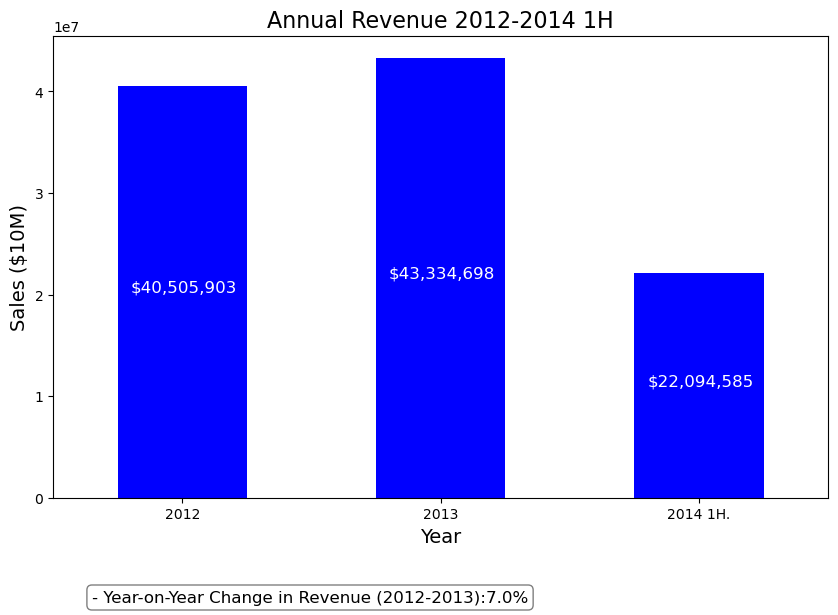

In [404]:
# Group the data by year and calculate the total sales for each year
yearly_sales = df_sales.groupby(df_sales['Date'].dt.year)['Sales'].sum()

# Create a bar chart of year on year sales
ax = yearly_sales.plot(kind='bar', figsize=(10,6), rot=0, color='blue')

# Set the chart title and axis labels
ax.set_title('Annual Revenue 2012-2014 1H', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Sales ($10M)', fontsize=14)

ax.set_xticklabels([int(year) if year != 2014 else '2014 1H.' for year in yearly_sales.index])

# Add data labels to the bars
for i, v in enumerate(yearly_sales):
    ax.text(i - 0.2, v/2, f'${v:,.0f}', fontsize=12, color='white')

# Calculate the year-on-year percentage change in revenue between 2012 and 2013
yoy_change = (yearly_sales.loc[2013] - yearly_sales.loc[2012]) / yearly_sales.loc[2012] * 100


# Add a text box underneath the bar chart to explain the year-on-year change in revenue
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
textstr = f'- Year-on-Year Change in Revenue (2012-2013):{yoy_change:.1f}%'
ax.text(0.05, -0.2, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)   
    
# Display the chart
plt.show()

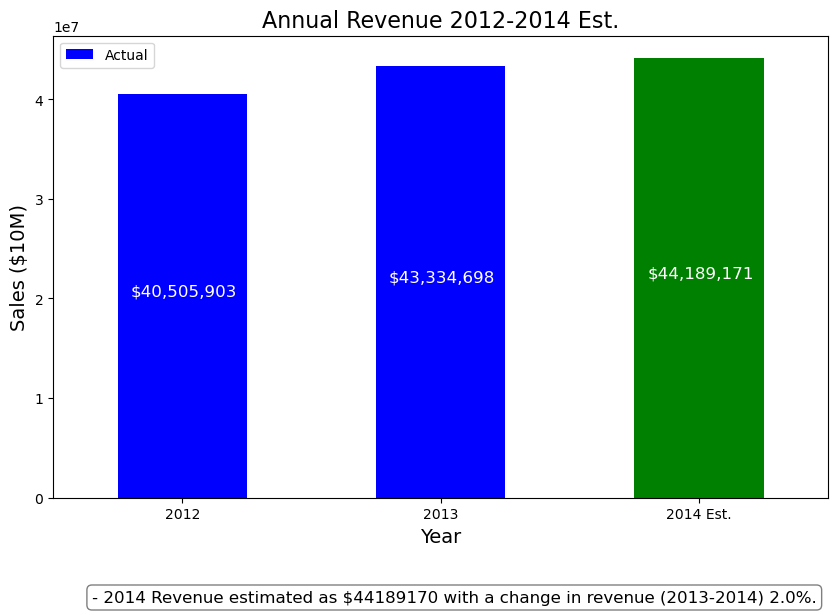

In [405]:
# Group the data by year and calculate the total sales for each year
yearly_sales = df_sales.groupby(df_sales['Date'].dt.year)['Sales'].sum()

# Estimate 2014 sales by using the increase in sales from the same period last year
estimated_2014_sales = yearly_sales.loc[2013] * (yearly_sales.loc[2014] / yearly_sales.loc[2013])

# Add the estimated sales to the actual sales for 2014
yearly_sales.loc[2014] += estimated_2014_sales

# Create a bar chart of year on year sales with estimated 2014 sales in a different color
ax = yearly_sales.plot(kind='bar', figsize=(10,6), rot=0, color=['blue' if year != 2014 else 'green' for year in yearly_sales.index])

# Set the chart title and axis labels
ax.set_title('Annual Revenue 2012-2014 Est.', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Sales ($10M)', fontsize=14)

# Add a legend
ax.legend(labels=['Estimated' if year == 2014 else 'Actual' for year in yearly_sales.index])

# Format the x-axis tick labels to show "2014 1H" instead of just "2014"
ax.set_xticklabels([int(year) if year != 2014 else '2014 Est.' for year in yearly_sales.index])

# Add data labels to the bars
for i, v in enumerate(yearly_sales):
    ax.text(i - 0.2, v/2, f'${v:,.0f}', fontsize=12, color='white')

# Calculate the year-on-year percentage change in revenue between 2012 and 2013
yoy_change = (yearly_sales.loc[2014] - yearly_sales.loc[2013]) / yearly_sales.loc[2013] * 100


# Add a text box underneath the bar chart to explain the year-on-year change in revenue
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
textstr = f'- 2014 Revenue estimated as ${int(yearly_sales.loc[2014])} with a change in revenue (2013-2014) {yoy_change:.1f}%.'
ax.text(0.05, -0.2, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)       
    
    
# Display the chart
plt.show()

# 2) Quarterly Revenue

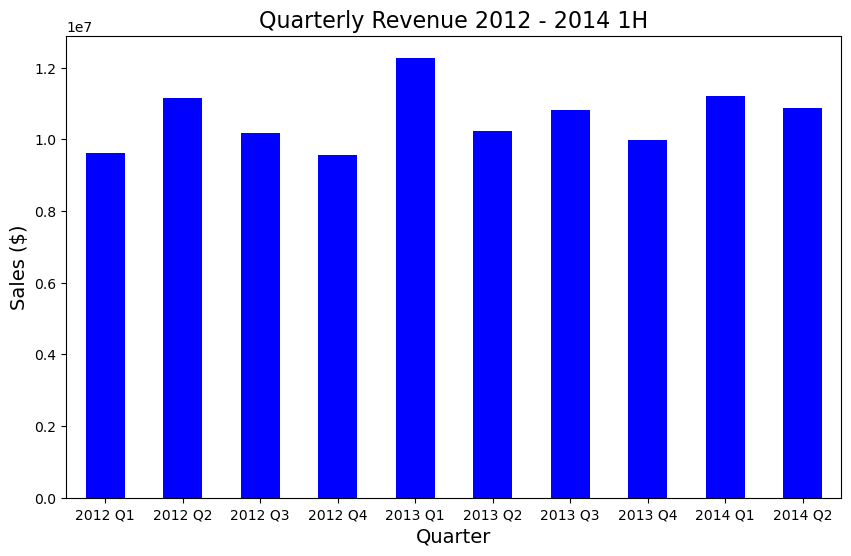

In [406]:
# Group the data by year and quarter and calculate the total sales for each quarter
quarterly_sales = df_sales.groupby([df_sales['Date'].dt.year, df_sales['Date'].dt.quarter])['Sales'].sum()

# Create a bar chart of quarterly sales
ax = quarterly_sales.plot(kind='bar', figsize=(10,6), rot=0, color='blue')

# Set the chart title and axis labels
ax.set_title('Quarterly Revenue 2012 - 2014 1H', fontsize=16)
ax.set_xlabel('Quarter', fontsize=14)
ax.set_ylabel('Sales ($)', fontsize=14)

# Set the x-axis tick labels to display the year and quarter
labels = [f"{year} Q{quarter}" for year, quarter in quarterly_sales.index]
ax.set_xticklabels(labels)

# Display the chart
plt.show()

# 3) Top 5 Product Groups

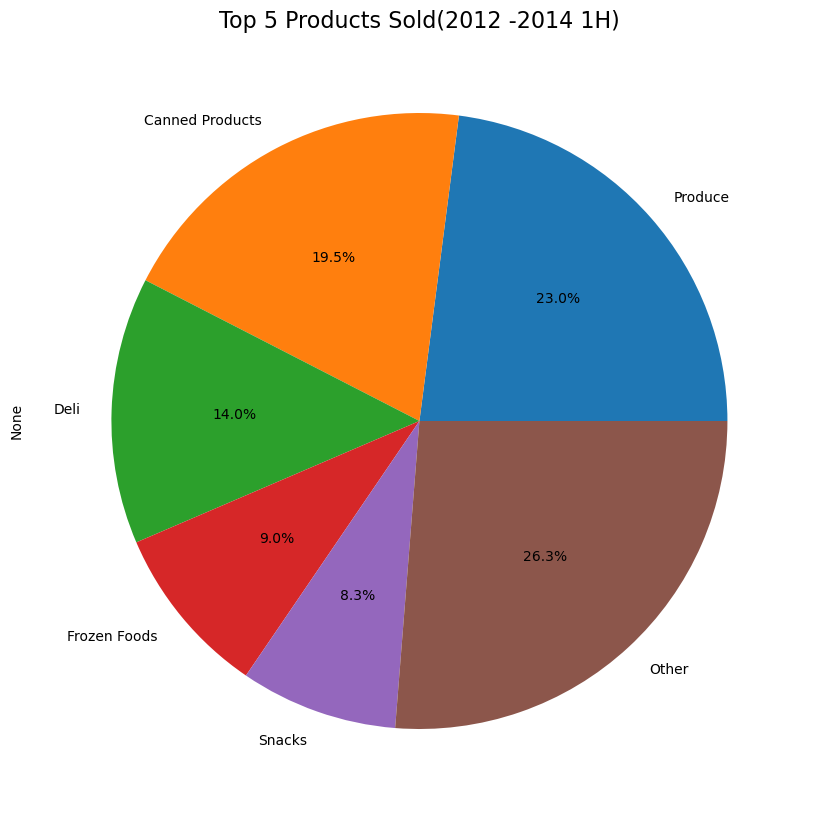

In [407]:
# Group the data by product and calculate the total sales for each product
product_sales = df_sales_items.groupby('Product Group')['Sales'].sum().sort_values(ascending=False)

# Filter out products with negative sales
product_sales = product_sales.loc[product_sales > 0]

# Get the top 5 products sold in 2013 and sum the rest as 'Other'
top_5_products = product_sales.head(5)
other_sales = product_sales[5:].sum()

# Concatenate the top 5 products with 'Other'
pie_data = pd.concat([top_5_products, pd.Series({'Other': other_sales})])

# Create a pie chart of the top 5 products and 'Other'
ax = pie_data.plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))

# Set the chart title
ax.set_title('Top 5 Products Sold(2012 -2014 1H)', fontsize=16)

# Display the chart
plt.show()

# 4) Product Groups with Highest and Lowest Average Margin

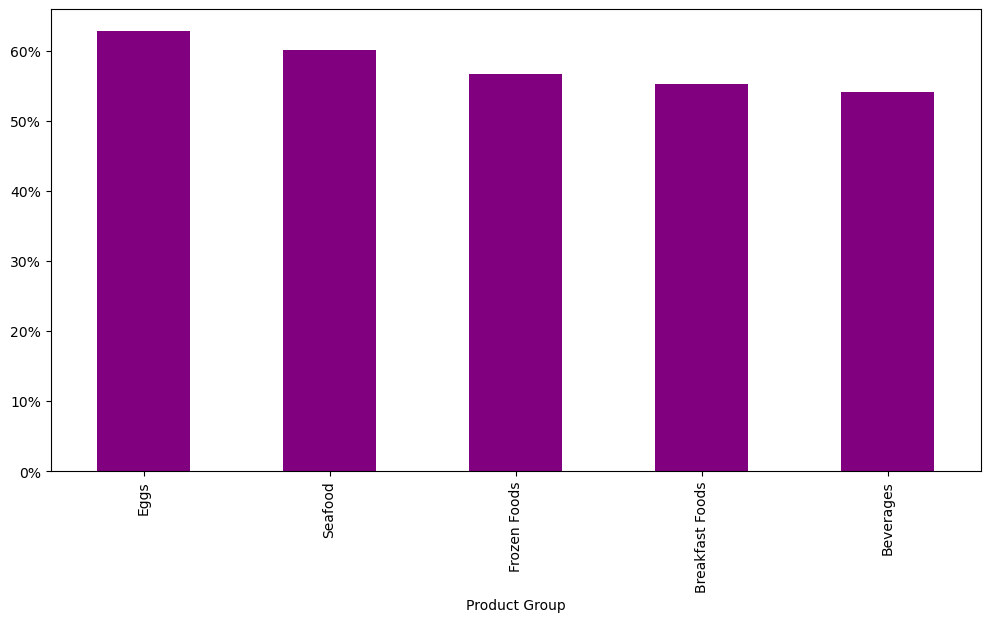

In [417]:
# Calculate the product margin per unit
df_sales_items['Product Margin'] = (df_sales_items['Margin'] / df_sales_items['Sales'])

# Group the data by product group and calculate the average product margin per unit for each group
group_margin = df_sales_items.groupby('Product Group')['Product Margin'].mean().sort_values(ascending=False)

# Get the top 10 product groups with the highest product margin per unit
top_10_groups = group_margin.head(5)

# Create a bar chart of the top 10 product groups with the highest product margin per unit
ax = top_10_groups.plot(kind='bar', figsize=(12,6), color='purple')

# Set the y-axis tick labels to percentage format using FixedLocator and FixedFormatter
ticks = ax.get_yticks()
ax.yaxis.set_major_locator(FixedLocator(ticks))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ticks])

# Display the chart
plt.show()

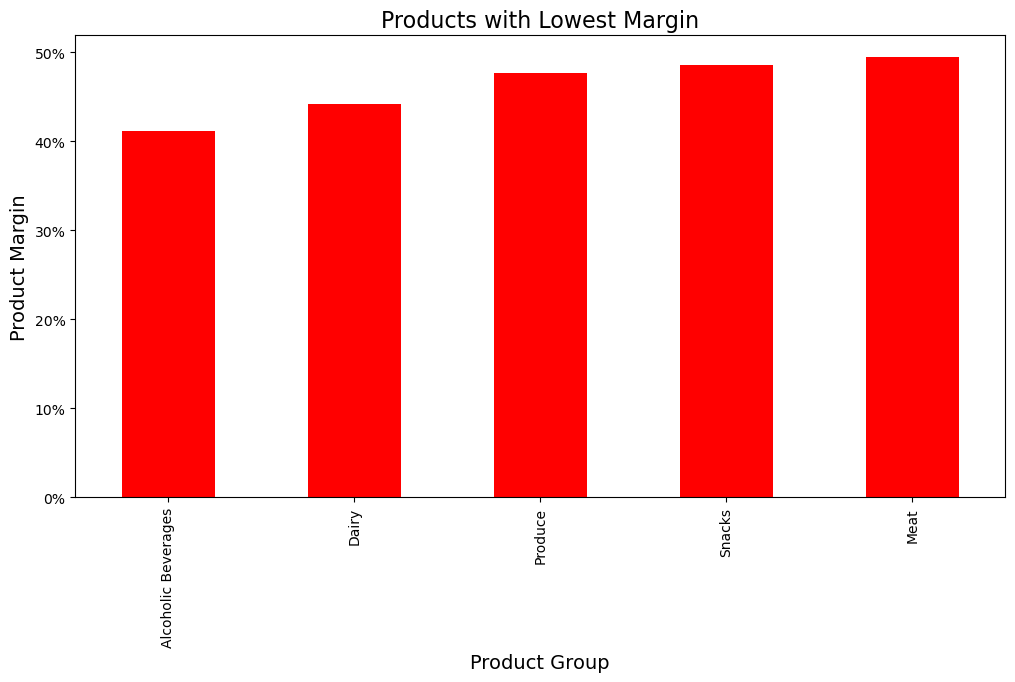

In [415]:
# Group the data by product group and calculate the average product margin per unit for each group
group_margin = df_sales_items.groupby('Product Group')['Product Margin'].mean().sort_values(ascending=True)

# Get the top 10 product groups with the lowest product margin per unit
bottom_10_groups = group_margin.head(5)

# Create a bar chart of the top 10 product groups with the lowest product margin per unit
fig, ax = plt.subplots(figsize=(12,6))
bottom_10_groups.plot(kind='bar', color='red', ax=ax)

# Set the chart title and axis labels
ax.set_title('Products with Lowest Margin', fontsize=16)
ax.set_xlabel('Product Group', fontsize=14)
ax.set_ylabel('Product Margin', fontsize=14)

# Set the y-axis tick labels to percentage format
ticks = ax.get_yticks()
ax.yaxis.set_major_locator(FixedLocator(ticks))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ticks])

# Display the chart
plt.show()

# 5) Managers with Highest Revenue

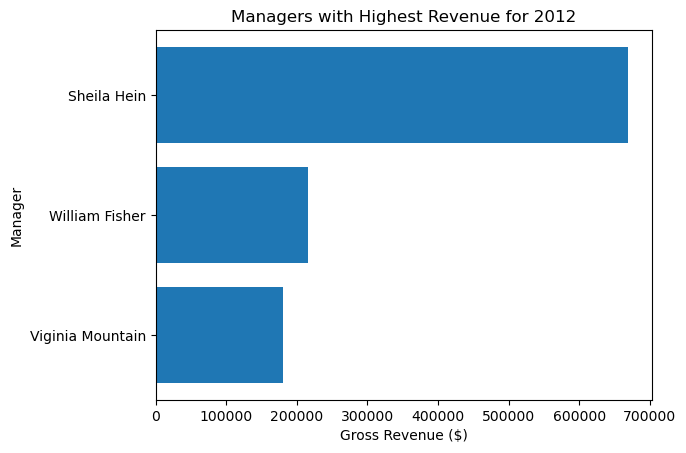

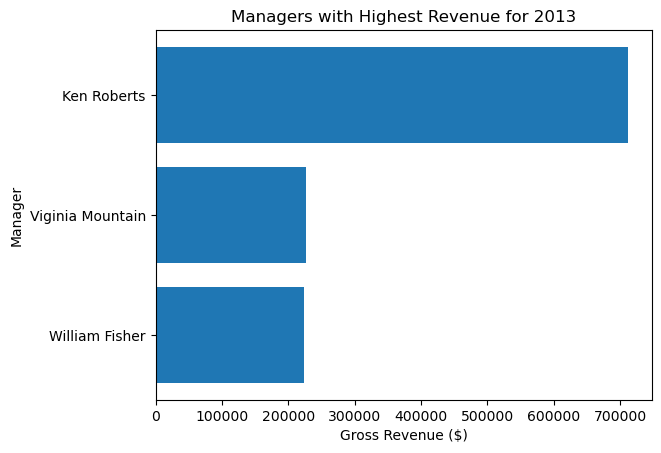

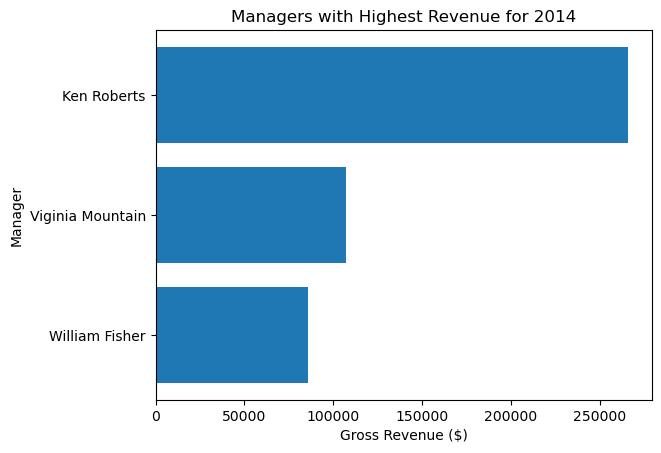

In [410]:
# Select data for years 2012-2014
df_sales_items_rep_year = df_sales_items_rep[df_sales_items_rep['Year'].isin([2012, 2013, 2014])]

# Group by year and sales rep name
df_sales_items_rep_top = df_sales_items_rep_year.groupby(['Year', 'Manager'])['GrossSales'].sum().reset_index()

# Sort by year and sales amount
df_sales_items_rep_top = df_sales_items_rep_top.sort_values(['Year', 'GrossSales'], ascending=[True, True])

# Get top 5 sales reps for each year
df_sales_items_rep_top = df_sales_items_rep_top.groupby('Year').head(3)

# Create horizontal bar chart for each year
for year in [2012, 2013, 2014]:
    df_year = df_sales_items_rep_top[df_sales_items_rep_top['Year'] == year]
    plt.barh(df_year['Manager'], df_year['GrossSales'])
    plt.title(f"Managers with Highest Revenue for {year}")
    plt.xlabel("Gross Revenue ($)")
    plt.ylabel("Manager")
    plt.show()

# 6) Market Size by Region

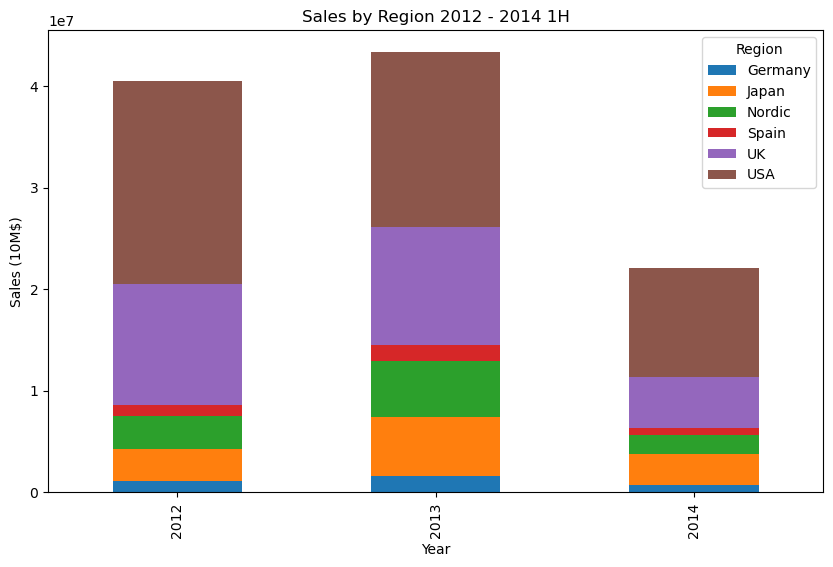

In [411]:
# Create a pivot table to aggregate the data by year and region
pivot_table = pd.pivot_table(df_final, values='Sales', index=['Year'], columns=['Region'], aggfunc=sum, fill_value=0)

# Create a stacked bar chart for each year
pivot_table.plot(kind='bar', stacked=True, figsize=(10,6))

# Add a title and labels for the axes
plt.title('Sales by Region 2012 - 2014 1H')
plt.xlabel('Year')
plt.ylabel('Sales (10M$)')

# Show the plot
plt.show()

Text(0, 0.5, 'Margin (10M$)')

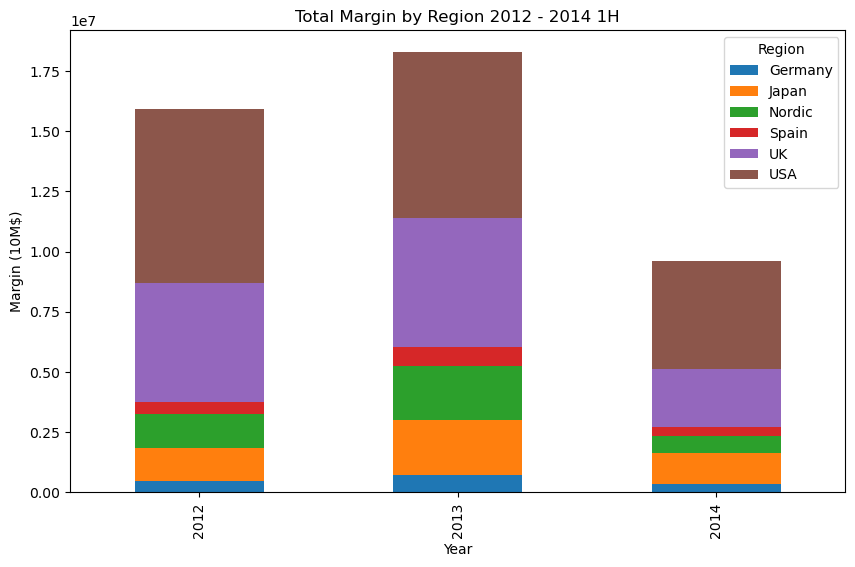

In [412]:
# Create a pivot table with Region as rows, Year as columns, and Gross Margin as values
pivot_table = pd.pivot_table(df_final, index='Year', columns='Region', values='Margin', aggfunc='sum')

# Create a stacked bar chart for each year
pivot_table.plot(kind='bar', stacked=True, figsize=(10,6))

# Add a title and labels for the axes
plt.title('Total Margin by Region 2012 - 2014 1H')
plt.xlabel('Year')
plt.ylabel('Margin (10M$)')